In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [11]:
housing = fetch_california_housing()

In [13]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## Convert dataset to dataframe

In [29]:
housing_df = pd.DataFrame(housing.data)
print(housing_df)

            0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]


In [31]:
housing_df = pd.DataFrame(housing.data,columns = housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
housing_df['target_price'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
housing_df.isnull().sum()

MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
target_price    0
dtype: int64

In [42]:
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target_price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [48]:
housing_x_val = housing_df.iloc[:,:-1]
housing_y_val = housing_df.iloc[:,-1]

In [49]:
housing_x_val.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [50]:
housing_y_val.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target_price, dtype: float64

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(housing_x_val,housing_x_val,test_size=0.3,random_state = 30)

In [70]:
std_scaler = StandardScaler()
X_train_transform = std_scaler.fit_transform(X_train)
X_test_transform = std_scaler.fit_transform(X_test)


In [72]:
lin_regression = LinearRegression()
lin_regression.fit(X_train_transform,Y_train)
pred_reg =lin_regression.predict(X_test_transform)
residula_val = Y_test-pred_reg

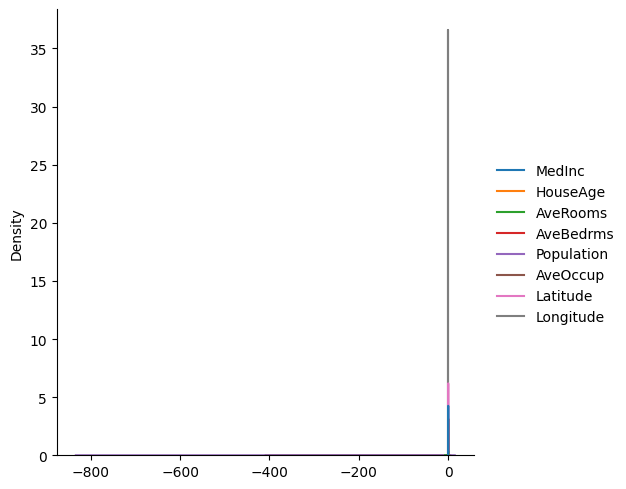

In [76]:
sns.displot(residula_val,kind="kde")

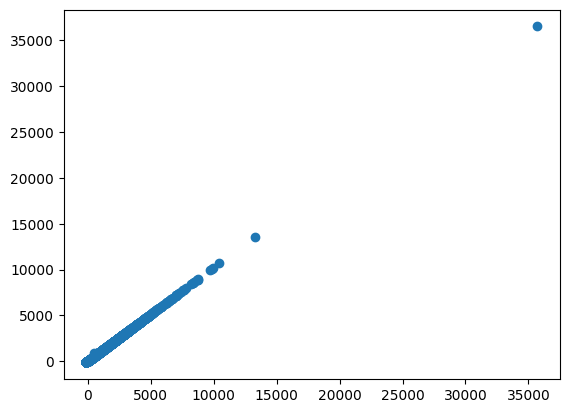

In [80]:
plt.scatter(Y_test,pred_reg)

In [82]:
print(mean_absolute_error(Y_test,pred_reg))
print(mean_squared_error(Y_test,pred_reg))
print(np.sqrt(mean_squared_error(Y_test,pred_reg)))

3.989286873758274
205.35793843955196
14.330315364274156


In [85]:
score=r2_score(Y_test,pred_reg)
print(score)

0.9125902848144114


## Compare Linear regressor with baselie model

In [87]:
from sklearn.dummy import DummyRegressor
base_model = DummyRegressor(strategy="mean")
base_model.fit(X_train_transform,Y_train)
base_prediction = base_model.predict(X_test_transform)
base_mse = mean_squared_error(Y_test,base_prediction)
print(base_mse)

155363.83274632672


## Pickling file for ddeployment

In [88]:
import pickle

In [90]:
pickle.dump(lin_regression,open('housing_california.pkl','wb'))